### Install necessary modules

In [26]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import pandas as pd
from matplotlib import pyplot as plt

### Data Load

In [28]:
df1 = pd.read_csv("Online_Retail.csv", encoding="latin1")


In [29]:
df1.shape

(541909, 8)

In [30]:
df1[df1.InvoiceNo=="C536379"]

InvoiceNo StockCode Description  Quantity       InvoiceDate  UnitPrice  \
141   C536379         D    Discount        -1  01-12-2010 09:41       27.5   

     CustomerID         Country  
141     14527.0  United Kingdom

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Data Cleaning: Handle Missing Values

In [32]:
df1.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [33]:
df1[df1['Description'].isnull()].head()

InvoiceNo StockCode Description  Quantity       InvoiceDate  UnitPrice  \
622     536414     22139         NaN        56  01-12-2010 11:52        0.0   
1970    536545     21134         NaN         1  01-12-2010 14:32        0.0   
1971    536546     22145         NaN         1  01-12-2010 14:33        0.0   
1972    536547     37509         NaN         1  01-12-2010 14:33        0.0   
1987    536549    85226A         NaN         1  01-12-2010 14:34        0.0   

      CustomerID         Country  
622          NaN  United Kingdom  
1970         NaN  United Kingdom  
1971         NaN  United Kingdom  
1972         NaN  United Kingdom  
1987         NaN  United Kingdom

In [34]:
df1[df1.StockCode=="22139"]

InvoiceNo StockCode                       Description  Quantity  \
106       536381     22139  RETROSPOT TEA SET CERAMIC 11 PC         23   
622       536414     22139                               NaN        56   
6392      536942     22139                            amazon        15   
6885      536982     22139  RETROSPOT TEA SET CERAMIC 11 PC         10   
7203      537011     22139                               NaN        -5   
...          ...       ...                               ...       ...   
538411    581405     22139  RETROSPOT TEA SET CERAMIC 11 PC          1   
539531    581439     22139  RETROSPOT TEA SET CERAMIC 11 PC          1   
540441    581486     22139  RETROSPOT TEA SET CERAMIC 11 PC          6   
541387    581498     22139  RETROSPOT TEA SET CERAMIC 11 PC          2   
541726    581570     22139  RETROSPOT TEA SET CERAMIC 11 PC          3   

             InvoiceDate  UnitPrice  CustomerID         Country  
106     01-12-2010 09:41       4.25     15311.0  United Kingdom  
622     01-12-2010 11:52       0.00         NaN  United Kingdom  
6392    03-12-2010 12:08       0.00         NaN  United Kingdom  
6885    03-12-2010 14:27      11.02         NaN  United Kingdom  
7203    03-12-2010 15:38       0.00         NaN  United Kingdom  
...                  ...        ...         ...             ...  
538411  08-12-2011 13:50       4.95     13521.0  United Kingdom  
539531  08-12-2011 16:30      10.79         NaN  United Kingdom  
540441  09-12-2011 09:38       4.95     17001.0  United Kingdom  
541387  09-12-2011 10:26      10.79         NaN  United Kingdom  
541726  09-12-2011 11:59       4.95     12662.0         Germany  

[993 rows x 8 columns]

In [35]:
df1[df1.StockCode=="22139"].Description.mode()

0    RETROSPOT TEA SET CERAMIC 11 PC 
Name: Description, dtype: object

In [36]:
most_freq = df1[["StockCode","Description"]].value_counts().reset_index()
most_freq

StockCode                         Description  count
0       85123A  WHITE HANGING HEART T-LIGHT HOLDER   2302
1        22423            REGENCY CAKESTAND 3 TIER   2200
2       85099B             JUMBO BAG RED RETROSPOT   2159
3        47566                       PARTY BUNTING   1727
4        20725             LUNCH BAG RED RETROSPOT   1638
...        ...                                 ...    ...
4787     35954                             counted      1
4788     35954                               check      1
4789     35923                               check      1
4790    35915C                             damaged      1
4791         m                              Manual      1

[4792 rows x 3 columns]

In [37]:
most_freq[most_freq.StockCode=="85123A"]

StockCode                         Description  count
0       85123A  WHITE HANGING HEART T-LIGHT HOLDER   2302
3310    85123A  CREAM HANGING HEART T-LIGHT HOLDER      9
4050    85123A                                   ?      1
4081    85123A         wrongly marked carton 22804      1

In [38]:
most_freq = most_freq.groupby("StockCode").head(1)
most_freq.head(5)

StockCode                         Description  count
0    85123A  WHITE HANGING HEART T-LIGHT HOLDER   2302
1     22423            REGENCY CAKESTAND 3 TIER   2200
2    85099B             JUMBO BAG RED RETROSPOT   2159
3     47566                       PARTY BUNTING   1727
4     20725             LUNCH BAG RED RETROSPOT   1638

In [39]:
most_freq[most_freq.StockCode=="85123A"]

StockCode                         Description  count
0    85123A  WHITE HANGING HEART T-LIGHT HOLDER   2302

In [40]:
most_freq.columns = ["StockCode", "freq_Description", "count"]
most_freq.head(3)

StockCode                    freq_Description  count
0    85123A  WHITE HANGING HEART T-LIGHT HOLDER   2302
1     22423            REGENCY CAKESTAND 3 TIER   2200
2    85099B             JUMBO BAG RED RETROSPOT   2159

In [41]:
df2 = df1.merge(most_freq, on="StockCode", how="left")
df2.head(3)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

        InvoiceDate  UnitPrice  CustomerID         Country  \
0  01-12-2010 08:26       2.55     17850.0  United Kingdom   
1  01-12-2010 08:26       3.39     17850.0  United Kingdom   
2  01-12-2010 08:26       2.75     17850.0  United Kingdom   

                     freq_Description   count  
0  WHITE HANGING HEART T-LIGHT HOLDER  2302.0  
1                 WHITE METAL LANTERN   328.0  
2      CREAM CUPID HEARTS COAT HANGER   293.0

In [42]:
df2[df2['Description'].isnull()]

InvoiceNo StockCode Description  Quantity       InvoiceDate  UnitPrice  \
622       536414     22139         NaN        56  01-12-2010 11:52        0.0   
1970      536545     21134         NaN         1  01-12-2010 14:32        0.0   
1971      536546     22145         NaN         1  01-12-2010 14:33        0.0   
1972      536547     37509         NaN         1  01-12-2010 14:33        0.0   
1987      536549    85226A         NaN         1  01-12-2010 14:34        0.0   
...          ...       ...         ...       ...               ...        ...   
535322    581199     84581         NaN        -2  07-12-2011 18:26        0.0   
535326    581203     23406         NaN        15  07-12-2011 18:31        0.0   
535332    581209     21620         NaN         6  07-12-2011 18:35        0.0   
536981    581234     72817         NaN        27  08-12-2011 10:33        0.0   
538554    581408     85175         NaN        20  08-12-2011 14:06        0.0   

        CustomerID         Country                     freq_Description  count  
622            NaN  United Kingdom     RETROSPOT TEA SET CERAMIC 11 PC   988.0  
1970           NaN  United Kingdom                                  NaN    NaN  
1971           NaN  United Kingdom      CHRISTMAS CRAFT HEART STOCKING     1.0  
1972           NaN  United Kingdom           NEW ENGLAND MUG W GIFT BOX    2.0  
1987           NaN  United Kingdom                                  NaN    NaN  
...            ...             ...                                  ...    ...  
535322         NaN  United Kingdom      DOG TOY WITH PINK CROCHET SKIRT   91.0  
535326         NaN  United Kingdom           HOME SWEET HOME KEY HOLDER  114.0  
535332         NaN  United Kingdom      SET OF 4 ROSE BOTANICAL CANDLES  172.0  
536981         NaN  United Kingdom  SET OF 2 CHRISTMAS DECOUPAGE CANDLE  164.0  
538554         NaN  United Kingdom                CACTI T-LIGHT CANDLES  148.0  

[1454 rows x 10 columns]

In [43]:
df2['Description'] = df2['Description'].mask(df2['Description'].isnull(), df2['freq_Description'])
df2.isnull().sum()

InvoiceNo                0
StockCode                0
Description            112
Quantity                 0
InvoiceDate              0
UnitPrice                0
CustomerID          135080
Country                  0
freq_Description       112
count                  112
dtype: int64

In [44]:
df2.dropna(subset=['Description'], inplace=True)
df2.isnull().sum()

InvoiceNo                0
StockCode                0
Description              0
Quantity                 0
InvoiceDate              0
UnitPrice                0
CustomerID          134968
Country                  0
freq_Description         0
count                    0
dtype: int64

In [45]:
df2.drop(columns = ["freq_Description", "count"], inplace=True)

After talking to a business manager, we confirmed that it is ok to have null values in CustomerID column

### Data Cleaning: Handle Invalid Values

In [46]:
df2.describe()

Quantity      UnitPrice     CustomerID
count  541797.000000  541797.000000  406829.000000
mean        9.555919       4.612067   15287.690570
std       218.103428      96.769831    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

Quanity and UnitPrice contains negative values. We need to fix it

In [47]:
df2[df2.Quantity<=0].shape

(10527, 8)

In [48]:
df2[df2.UnitPrice<=0].shape

(2405, 8)

In [49]:
# Remove negative or zero quantities and prices
df3 = df2[(df2['Quantity'] > 0) & (df2['UnitPrice'] > 0)]
df3.describe()

Quantity      UnitPrice     CustomerID
count  530104.000000  530104.000000  397884.000000
mean       10.542037       3.907625   15294.423453
std       155.524124      35.915681    1713.141560
min         1.000000       0.001000   12346.000000
25%         1.000000       1.250000   13969.000000
50%         3.000000       2.080000   15159.000000
75%        10.000000       4.130000   16795.000000
max     80995.000000   13541.330000   18287.000000

We can notice HUGE values in both Quantity and UnitPrice. Let us use quantile to remove those big values (outliers)

In [50]:
df3.Quantity.quantile(0.9999)

1439.8763999990188

For now, we are not going to worry about extreme values because these can be legitimate values

### Feature Engineering: Create New Columns

In [51]:
df3.head(2)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom

In [52]:
df4 = df3.copy()

df4['TotalSales'] = df4['Quantity'] * df4['UnitPrice']
df4.head(2)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   

        InvoiceDate  UnitPrice  CustomerID         Country  TotalSales  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom       15.30  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom       20.34

In [54]:
# Ensure InvoiceDate is in datetime format
df4['InvoiceDate'] = pd.to_datetime(df4['InvoiceDate'], errors='coerce')

# Now extract the month
df4['Month'] = df4['InvoiceDate'].dt.month

# Check the results
print(df4[['InvoiceDate', 'Month']].sample(5))


               InvoiceDate  Month
242224                 NaT    NaN
415903                 NaT    NaN
461911                 NaT    NaN
217707 2011-08-06 08:31:00    8.0
43882  2011-05-01 11:30:00    5.0


### Data Visualization and Insights

#### 1. Plot Monthly Total Sales Trend

In [ ]:
monthly_sales = df4.groupby('Month')['TotalSales'].sum()
monthly_sales

Month
1      691364.560
2      523631.890
3      717639.360
4      537808.621
5      770536.020
6      761739.900
7      719221.191
8      759138.380
9     1058590.172
10    1154979.300
11    1509496.330
12    1462538.820
Name: TotalSales, dtype: float64

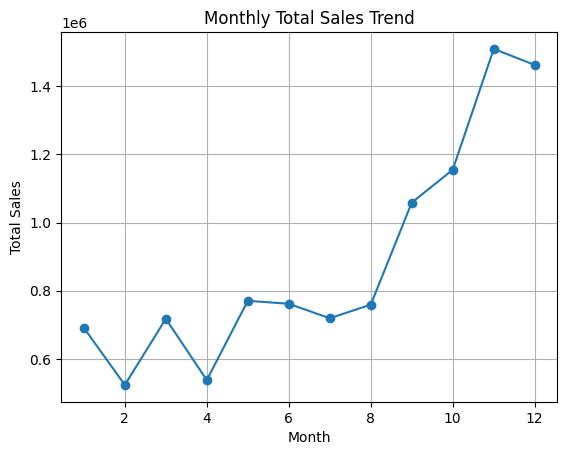

In [ ]:
monthly_sales.plot(kind='line', title='Monthly Total Sales Trend', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

**Insights**

Total sales started rising up in August having a peek in November. This is likely due to the holiday season at the end of the year

#### 2. Top 5 countries based on total sales

In [ ]:
df4.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(5)

Country
United Kingdom    9025222.084
Netherlands        285446.340
EIRE               283453.960
Germany            228867.140
France             209715.110
Name: TotalSales, dtype: float64

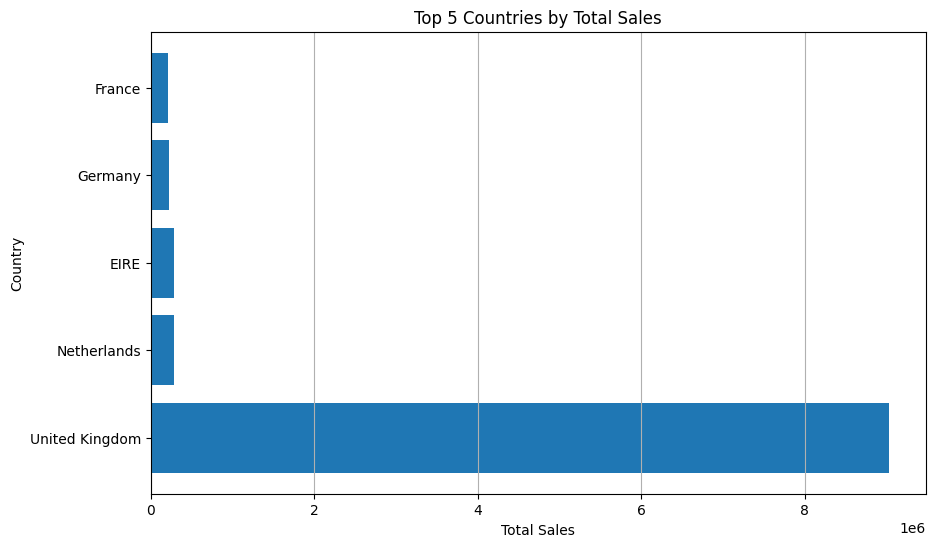

In [ ]:
# prompt: plot horizontal bar chart for country wise monthly sales for top 5 countries

import matplotlib.pyplot as plt
top_5_countries = df4.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_5_countries.index, top_5_countries.values)
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.title('Top 5 Countries by Total Sales')
plt.grid(axis='x')
plt.show()


**Insights**

1. UK has the highest sales (around 9 million)
1. Netherlands, EIRE, Germany and France are the next 4 countries each having a sales of more than 2 million

Since these countries cover the major sales revenues, we need to pay special attention to customers in these countries and make sure our product quality and service are the best. Also to break dependancy of sales from a single country we can focus on expanding sales in other countries as well

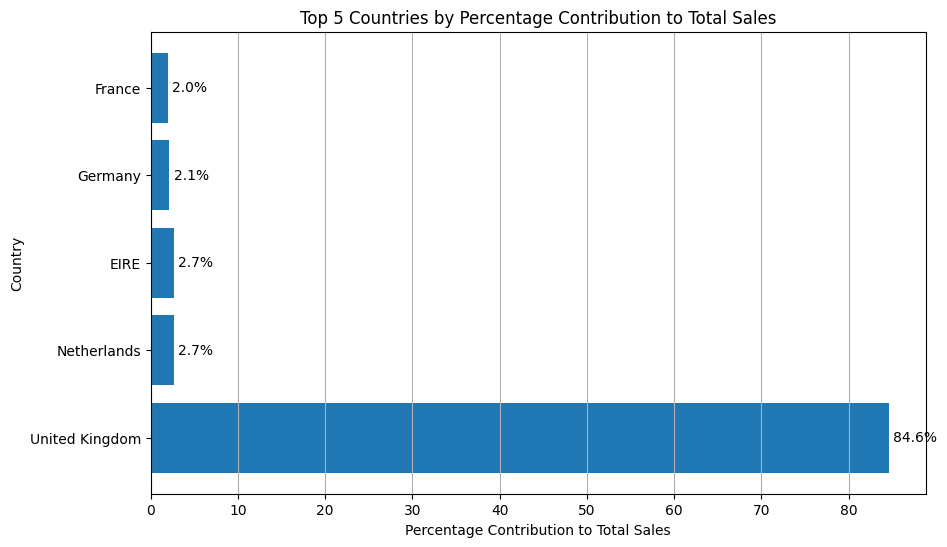

In [ ]:
# prompt: Plot same chart as above but this time use percentage contribution. Show % on the bar

import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt


country_wise_sales = df4.groupby('Country')['TotalSales'].sum()
total_sales = country_wise_sales.sum()

top_5_countries = country_wise_sales.sort_values(ascending=False).head(5)
percentages = (top_5_countries / total_sales) * 100

plt.figure(figsize=(10, 6))
bars = plt.barh(top_5_countries.index, percentages)
plt.xlabel('Percentage Contribution to Total Sales')
plt.ylabel('Country')
plt.title('Top 5 Countries by Percentage Contribution to Total Sales')
plt.grid(axis='x')

# Add percentage labels to the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%', va='center')

plt.show()


#### 3. Top 5 products based on total sales

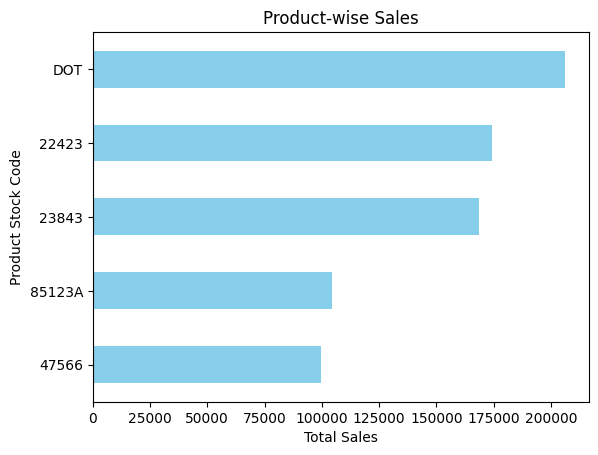

In [ ]:
product_wise_sales = df4.groupby('StockCode')['TotalSales'].sum()

top_5_products = product_wise_sales.sort_values(ascending=False).head(5)
top_5_products.plot(kind='barh', color='skyblue')
plt.title('Product-wise Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Stock Code')
plt.gca().invert_yaxis()  # To show the highest sales at the top
plt.show()

In [ ]:
product_wise_sales.sort_values(ascending=False)

StockCode
DOT       206248.770
22423     174484.740
23843     168469.600
85123A    104518.800
47566      99504.330
             ...    
90084          0.850
21268          0.840
51014c         0.830
84227          0.420
PADS           0.003
Name: TotalSales, Length: 3922, dtype: float64

In [ ]:
product_wise_sales.sum()

10666684.544

In [ ]:
df4[df4.StockCode=="DOT"].Description.iloc[0]

'DOTCOM POSTAGE'

In [ ]:
for stock_code in top_5_products.index:
    description = df4[df4.StockCode==stock_code].Description.iloc[0]
    print(f"{stock_code} ==> {description}")

DOT ==> DOTCOM POSTAGE
22423 ==> REGENCY CAKESTAND 3 TIER
23843 ==> PAPER CRAFT , LITTLE BIRDIE
85123A ==> WHITE HANGING HEART T-LIGHT HOLDER
47566 ==> PARTY BUNTING


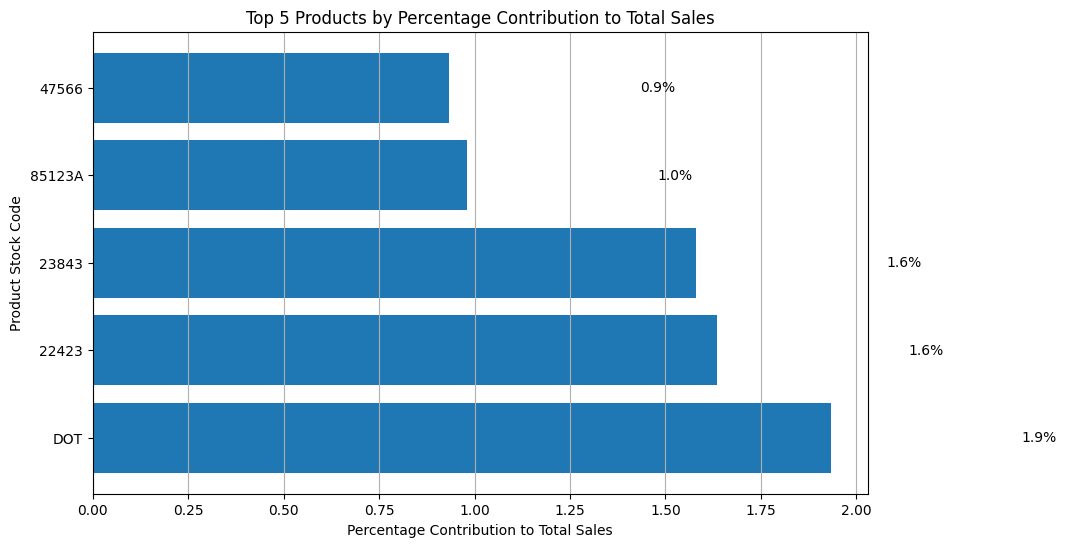

In [ ]:
# prompt: Plot same chart as above for product sales but use percentage this time. Show % on the bar

# Assuming df4 is already created from the previous code
total_sales = product_wise_sales.sum()
percentages = (top_5_products / total_sales) * 100

plt.figure(figsize=(10, 6))
bars = plt.barh(top_5_products.index, percentages)
plt.xlabel('Percentage Contribution to Total Sales')
plt.ylabel('Product Stock Code')
plt.title('Top 5 Products by Percentage Contribution to Total Sales')
plt.grid(axis='x')

# Add percentage labels to the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%', va='center')

plt.show()


#### 4. RFM Analysis (Recency, Frequency, Monetary)

In [ ]:
df4['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [ ]:
current_date = df4['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df4.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSales': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

Recency  Frequency  Monetary
CustomerID                              
12346.0         326          1  77183.60
12347.0           2        182   4310.00
12348.0          75         31   1797.24
12349.0          19         73   1757.55
12350.0         310         17    334.40

In [ ]:
rfm.describe()

Recency    Frequency       Monetary
count  4338.000000  4338.000000    4338.000000
mean     92.536422    91.720609    2054.266460
std     100.014169   228.785094    8989.230441
min       1.000000     1.000000       3.750000
25%      18.000000    17.000000     307.415000
50%      51.000000    41.000000     674.485000
75%     142.000000   100.000000    1661.740000
max     374.000000  7847.000000  280206.020000

In [ ]:
# Segment Customers based on RFM
rfm['R_Segment'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Segment'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_Segment'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])
rfm['RFM_Score'] = rfm[['R_Segment', 'F_Segment', 'M_Segment']].sum(axis=1)

In [ ]:
rfm.sample(5)

Recency  Frequency  Monetary R_Segment F_Segment M_Segment  \
CustomerID                                                               
13160.0          22          4     91.80         3         1         1   
15539.0           7         41    538.46         4         2         2   
15228.0          66        125   3386.71         2         4         4   
13366.0          50          1     56.16         3         1         1   
17320.0         100         73   1200.62         2         3         3   

            RFM_Score  
CustomerID             
13160.0             5  
15539.0             8  
15228.0            10  
13366.0             5  
17320.0             8

In [ ]:
# Customers with highest RFM Scores
rfm.sort_values('RFM_Score', ascending=False)

Recency  Frequency  Monetary R_Segment F_Segment M_Segment  \
CustomerID                                                               
18198.0           4        159   5425.56         4         4         4   
18210.0           2        134   2621.38         4         4         4   
18225.0           3        271   5509.12         4         4         4   
18283.0           4        756   2094.88         4         4         4   
16983.0          13        148   1931.25         4         4         4   
...             ...        ...       ...       ...       ...       ...   
12402.0         323         11    225.60         1         1         1   
18185.0         249         17    304.25         1         1         1   
18190.0         192         15    284.46         1         1         1   
18191.0         262          7    207.80         1         1         1   
18193.0         165         16    243.76         1         1         1   

            RFM_Score  
CustomerID             
18198.0            12  
18210.0            12  
18225.0            12  
18283.0            12  
16983.0            12  
...               ...  
12402.0             3  
18185.0             3  
18190.0             3  
18191.0             3  
18193.0             3  

[4338 rows x 7 columns]

#### 5. Customer Churn Analysis

In [ ]:
df4.head(2)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalSales  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   

   Month  
0     12  
1     12

In [ ]:
# Create a basket matrix for association rule mining
customer_last_purchase = df4.groupby("CustomerID")['InvoiceDate'].max()
customer_last_purchase.head(5)

CustomerID
12346.0   2011-01-18 10:01:00
12347.0   2011-12-07 15:52:00
12348.0   2011-09-25 13:13:00
12349.0   2011-11-21 09:51:00
12350.0   2011-02-02 16:01:00
Name: InvoiceDate, dtype: datetime64[ns]

In [ ]:
type(customer_last_purchase)

pandas.core.series.Series

In [ ]:
current_date

Timestamp('2011-12-10 12:50:00')

In [ ]:
customer_last_purchase = (current_date - customer_last_purchase).dt.days
customer_last_purchase.head(5)

CustomerID
12346.0    326
12347.0      2
12348.0     75
12349.0     19
12350.0    310
Name: InvoiceDate, dtype: int64

In [ ]:
# Define churn threshold (e.g., 90 days without purchase)
churn_threshold = 90
churned_customers = customer_last_purchase[customer_last_purchase > churn_threshold]
churned_customers.head(5)

CustomerID
12346.0    326
12350.0    310
12353.0    204
12354.0    232
12355.0    214
Name: InvoiceDate, dtype: int64

Number of Churned Customers: 1449


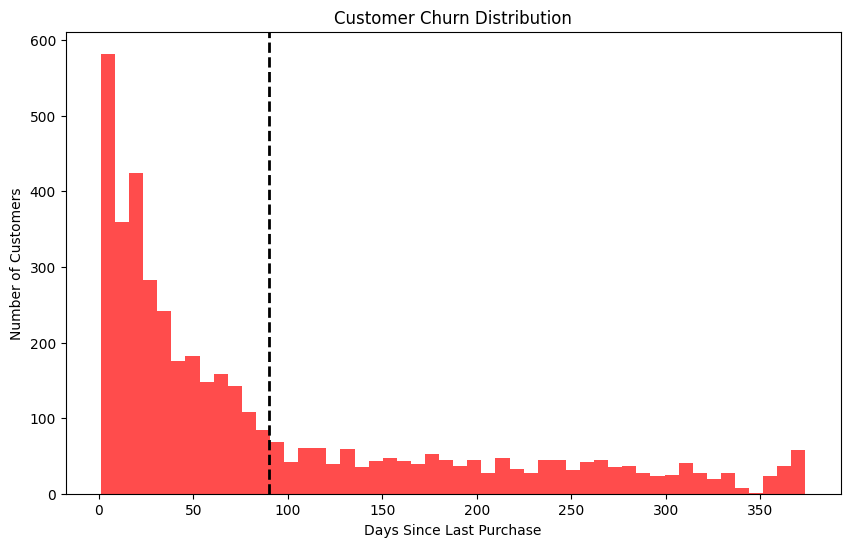

In [ ]:
print("Number of Churned Customers:", len(churned_customers))
plt.figure(figsize=(10, 6))
plt.hist(customer_last_purchase, bins=50, color='red', alpha=0.7)
plt.axvline(churn_threshold, color='black', linestyle='dashed', linewidth=2)
plt.title('Customer Churn Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
print(f"[{pd.__name__}] total time taken: {time.time() - stime} sec")